# Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

In [2]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X_quad, y_quad)

,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


[Text(0.5, 0.8333333333333334, 'x[0] <= -0.303\nsquared_error = 0.006\nsamples = 200\nvalue = 0.088'),
 Text(0.25, 0.5, 'x[0] <= -0.408\nsquared_error = 0.002\nsamples = 44\nvalue = 0.172'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.001\nsamples = 20\nvalue = 0.213'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.001\nsamples = 24\nvalue = 0.138'),
 Text(0.75, 0.5, 'x[0] <= 0.272\nsquared_error = 0.005\nsamples = 156\nvalue = 0.065'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.001\nsamples = 110\nvalue = 0.028'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.002\nsamples = 46\nvalue = 0.154')]

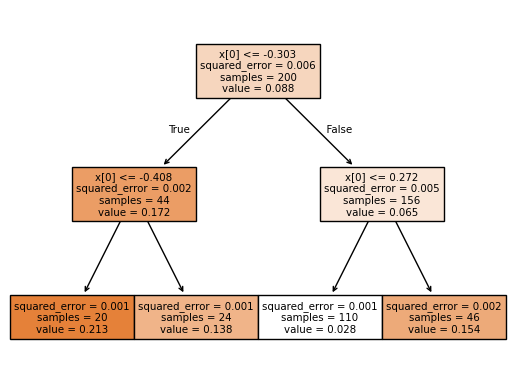

In [3]:
from sklearn.tree import plot_tree

plot_tree(tree_reg, filled=True)

In [4]:
tree_reg2 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg2.fit(X_quad, y_quad)

,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [5]:
tree_reg.tree_.threshold

array([-0.30265072, -0.40830374, -2.        , -2.        ,  0.27175756,
       -2.        , -2.        ])

In [6]:
tree_reg2.tree_.threshold

array([-0.30265072, -0.40830374, -0.45416115, -2.        , -2.        ,
       -0.37022041, -2.        , -2.        ,  0.27175756, -0.21270403,
       -2.        , -2.        ,  0.40399227, -2.        , -2.        ])

In [7]:
def plot_regression_predictions(tree_reg, X, y, axes=[-0.5, 0.5, -0.05, 0.25]):
	x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
	y_pred = tree_reg.predict(x1)
	plt.axis(axes)
	plt.xlabel("$x_1$")
	plt.plot(X, y, "b.")
	plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

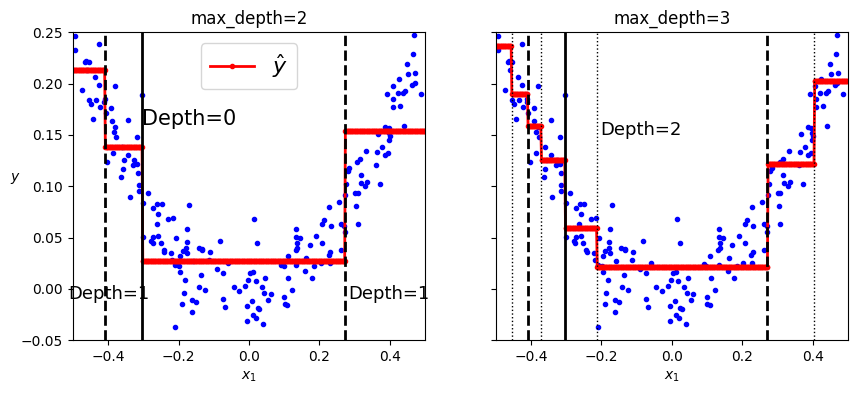

In [8]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg, X_quad, y_quad)

th0, th1a, th1b = tree_reg.tree_.threshold[[0, 1, 4]]
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
	plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
plt.text(th0, 0.16, "Depth=0", fontsize=15)
plt.text(th1a + 0.01, -0.01, "Depth=1", horizontalalignment="center", fontsize=13)
plt.text(th1b + 0.01, -0.01, "Depth=1", fontsize=13)
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center", fontsize=16)
plt.title("max_depth=2")

plt.sca(axes[1])
th2s = tree_reg2.tree_.threshold[[2, 5, 9, 12]]
plot_regression_predictions(tree_reg2, X_quad, y_quad)
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
	plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
for split in th2s:
	plt.plot([split, split], [-0.05, 0.25], "k:", linewidth=1)
plt.text(th2s[2] + 0.01, 0.15, "Depth=2", fontsize=13)
plt.title("max_depth=3")
plt.show()

The CART algorithm works mostly the same way as earlier, except that instead of trying to split the training set in a way that minimizes impurity,it now tries ti split the training set in a way that minimizes the MSE.

CART cost function for regression
$$
J(k, t_k) = \frac{m_{\text{left}}}{m} \text{MSE}_{\text{left}} + \frac{m_{\text{right}}}{m} \text{MSE}_{\text{right}} \quad \text{where} \quad
\left\{
\begin{aligned}
\text{MSE}_{\text{node}} &= \sum_{i \in \text{node}} \left( \hat{y}_{\text{node}} - y^{(i)} \right)^2 \\
\hat{y}_{\text{node}} &= \frac{1}{m_{\text{node}}} \sum_{i \in \text{node}} y^{(i)}
\end{aligned}
\right.
$$

